<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial1.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial1.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 1: Distributions

**Week 2, Day 3, Extremes & Variability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Younkap Nina Duplex, Sloane Garelick, Zahra Khodakaramimaghsoud, Peter Ohue, Laura Paccini, Jenna Pearson, Agustina Pesce, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 30 minutes

In this initial tutorial, your focus will be on examining the distribution of annual extreme precipitation levels in Germany. Your objective is to explore various aspects of the distribution, including the mean, variance, and skewness. By the end of this tutorial, you will be able to:

- Visualize an observational record as both a time series and a distribution.
- Compute the *moments* of a record.
- Generate and plot a distribution with predefined *moments*.

# Setup

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pooch
import tempfile
from scipy import stats

In [2]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W2D3_T1"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


In [3]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [4]:
# @title Helper functions


def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W2D3_ExtremesandVariability"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [5]:
# @title Video 1: Distributions

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'FGZ99bk2dBc'), ('Bilibili', 'BV1bj411Z739')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [6]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Distributions_Video")

In [7]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "6vu3z"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/6vu3z/


In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Distributions_Slides")

# Section 1: Inspect a Precipitation Record and Plot it Over Time

Extreme rainfall can pose flood hazards with disasterous consequences for society, the economy, and ecosystems. Annual maximum daily precipitation is a valuable measurement for assessing flood risks, and in this tutorial you will start the journey of statistically analyzing a dataset of annual maximum daily precipitation records for Germany.

First, download the precipitation files:

In [9]:
# download file: 'precipitationGermany_1920-2022.csv'
filename_precipitationGermany = "precipitationGermany_1920-2022.csv"
url_precipitationGermany = "https://osf.io/xs7h6/download"
data = pd.read_csv(
    pooch_load(url_precipitationGermany, filename_precipitationGermany), index_col=0
).set_index("years")
data.columns = ["precipitation"]
precipitation = data.precipitation

SHA256 hash of downloaded file: ef9f29e709a1db0745c28bcb9460dac22f6c9624de41d9e2187ab547e9aaa3c8
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [10]:
precipitation

,precipitation
years,
1920,24.5
1921,27.7
1922,15.6
1923,23.5
1924,59.9
...,...
2018,31.6
2019,24.9
2020,33.3


You can see that for each year between 1920 and 2022, there is one number. This represents the largest amount of precipitation that was observed at a point in Germany at 51 N 6 E. In other words, one looked at each day's precipitation for each year and included the highest amount in this time series.

Now we can plot a time series of the data from 1920-2022.

Text(0, 0.5, 'Annual Maximum Daily Precipitation \n(mm/day)')

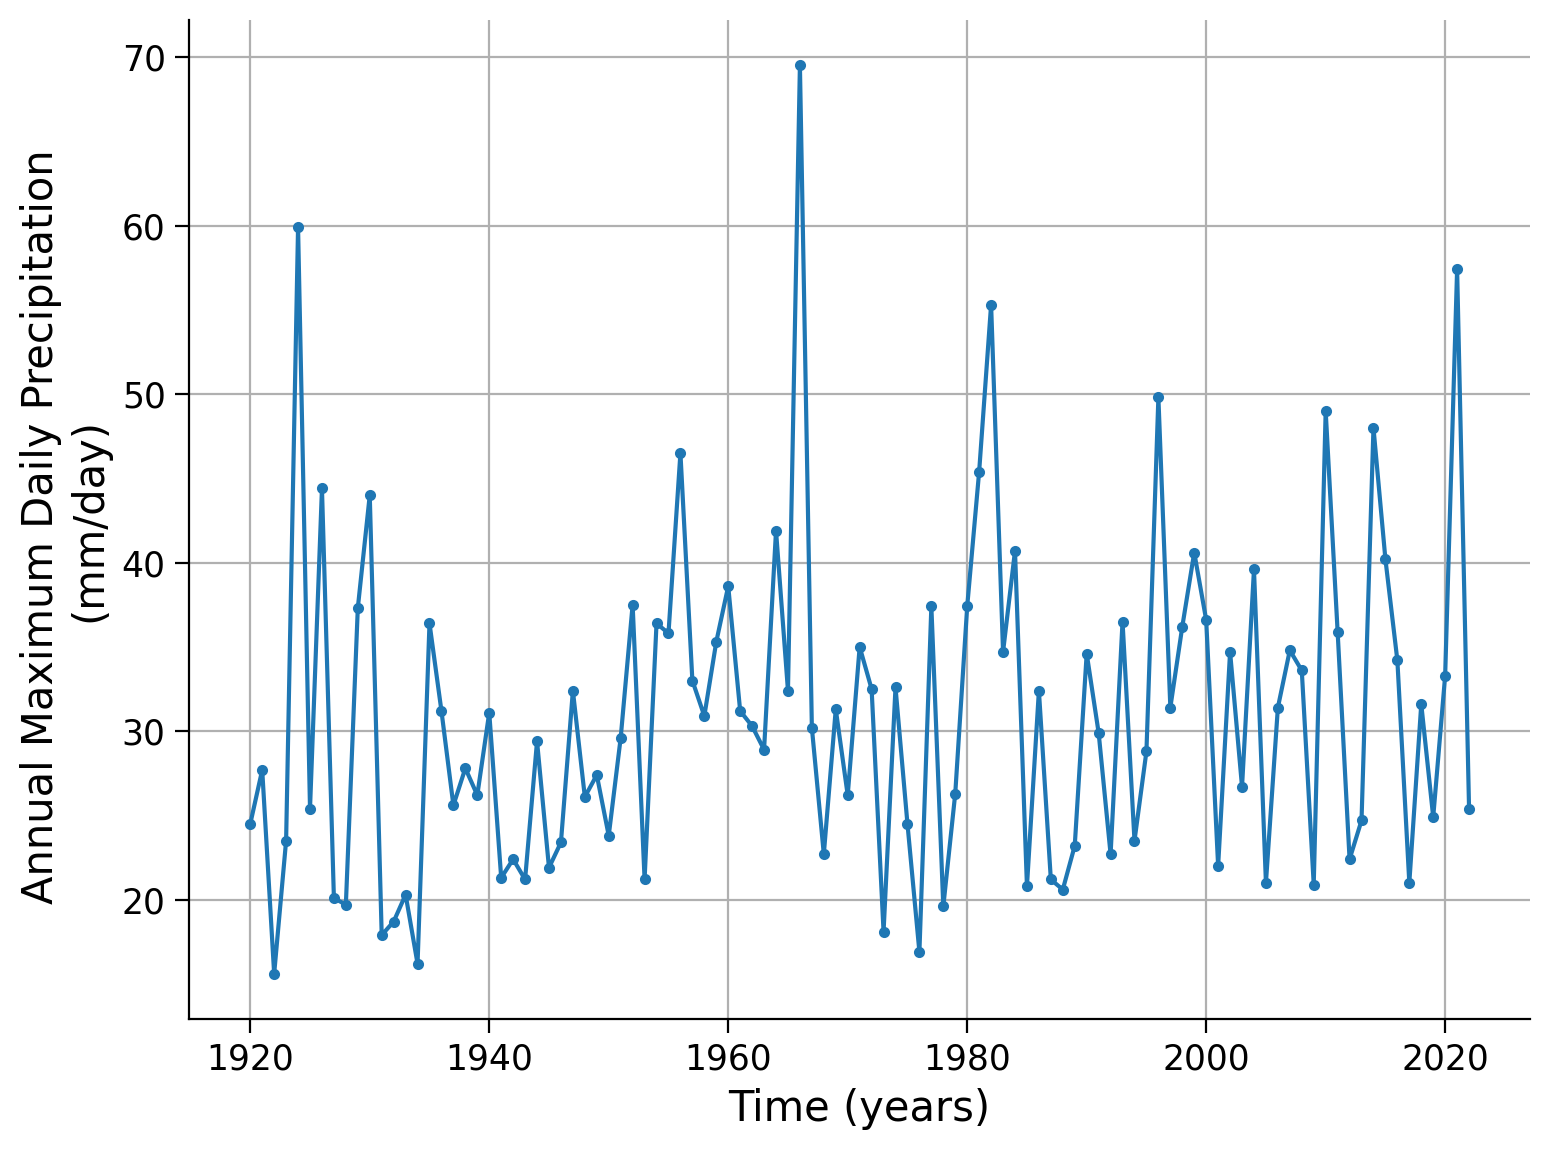

In [11]:
precipitation.plot.line(style=".-",grid=True)
plt.xlabel("Time (years)")
plt.ylabel("Annual Maximum Daily Precipitation \n(mm/day)")

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
A time series of the annual maximum daily precipitation in millimeters per day per year. The data ranges from approximately 16 mm/day in the 1920s to almost 70 mm/day around 1970. About four peaks show unusual events of extreme precipitation (in 1924, 1966, 1982 and 2021). Moreover, a positive trend over time seems to be visible.
</details>

To make this dataset more interpretable, we can plot a histogram of the data. Recall that we can make a histogram of this data by plotting the y-axis from the previous figure on the x-axis of this new figure versus the count of how many data points fall within a 'bin' on the x-axis.

Text(0.5, 0, 'Annual Maximum Daily Precipitation \n(mm/day)')

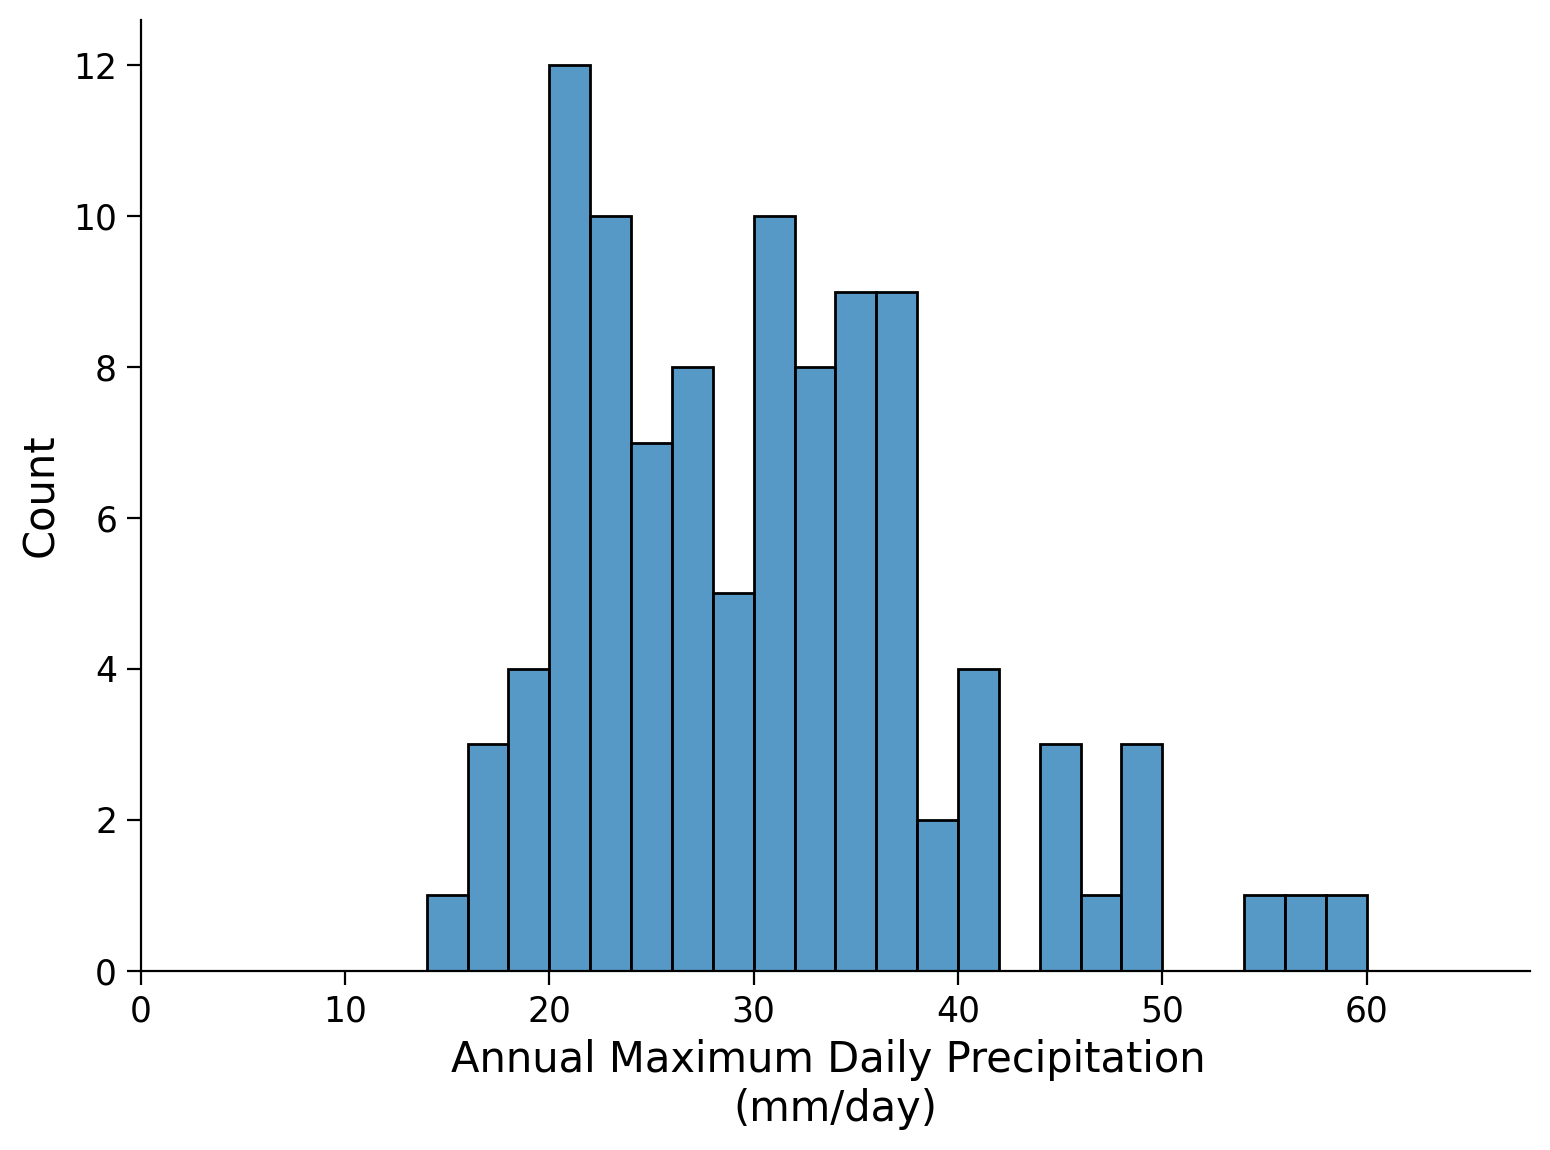

In [12]:
# create the bins (x axis) for the data
fig, ax = plt.subplots()
bins = np.arange(0, precipitation.max(), 2)

# make the histogram
sns.histplot(precipitation, bins=bins, ax=ax)

# set limits and labels
ax.set_xlim(bins[0], bins[-1])
ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
Histogram plot of the annual maximum daily precipitation in millimeters per day. The horizontal axis of the histogram represents the data's range via bins, while the vertical axis represents the frequency of occurrences within each interval by counting the number of data points that fall into each bin.
By visually inspecting the histogram we get an impression of the shape, central tendency, and spread of the dataset.
The bin with the largest amount of occurrences shows 12 counts of annual maximum daily precipitation between 20 and 22 millimeters per day.
Bins that show at least one count range from 14 millimeters per day to 60 millimeters per day.
</details>

Next let's calculate the moments of our dataset. A [moment](https://glossary.ametsoc.org/wiki/Moment) helps us define the center of mass ([mean](https://glossary.ametsoc.org/wiki/Expected_value)), scale ([variance](https://glossary.ametsoc.org/wiki/Variance)), and shape ([skewness](https://glossary.ametsoc.org/wiki/Skewness) and [kurtosis](https://glossary.ametsoc.org/wiki/Kurtosis)) of a distribution. The scale is how the data is stretched or compressed along the x-axis, while the shape parameters help us answer questions about the geometry of the distribution, for example if data points lie more frequently to one side of the mean than the other or if the tails are 'heavy' (i.e. larger chance of getting extreme values).

Let's compute the mean, the variance and the [standard deviation](https://glossary.ametsoc.org/wiki/Standard_deviation) of your precipitation data. Plot the mean as a vertical line on the histogram.

In [13]:
# mean
mean_pr = precipitation.mean()

# variance
var_pr = precipitation.var()

# standard deviation
std_pr = precipitation.std()

In [14]:
mean_pr, var_pr, std_pr

(np.float64(30.97184466019418), 98.55047401484866, 9.927259139100212)

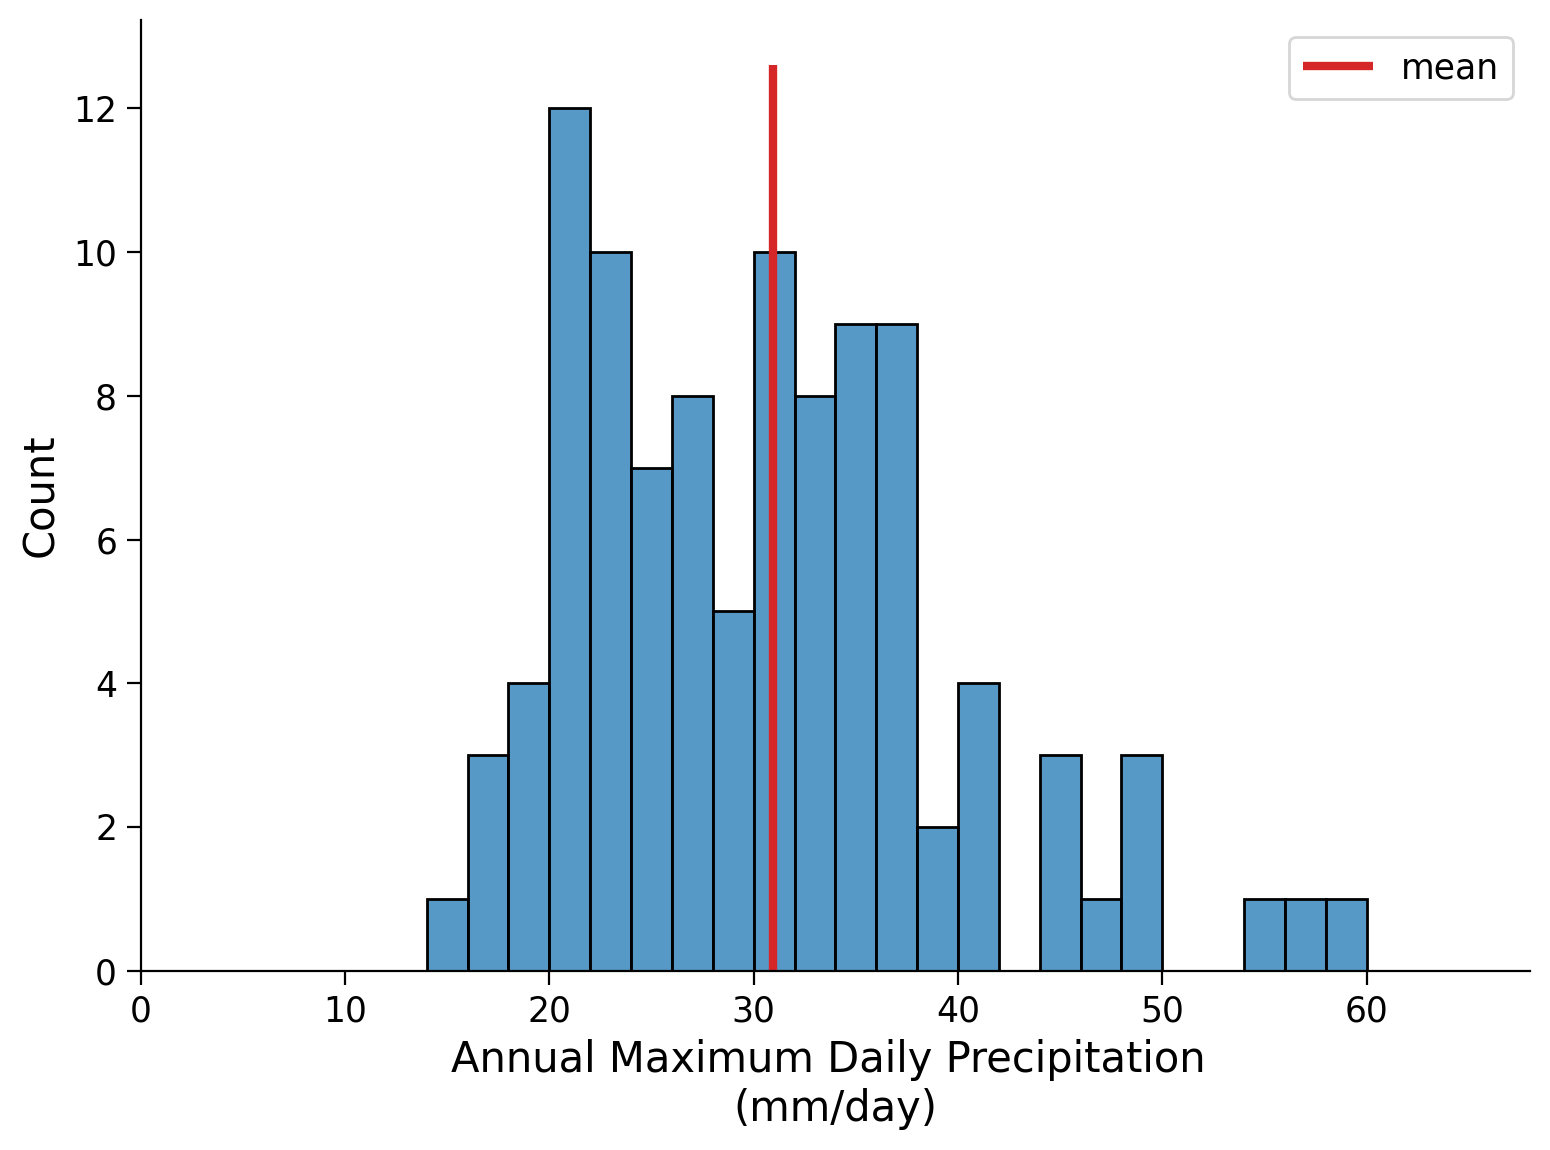

In [15]:
# re-plot histogram from above
fig, ax = plt.subplots()
bins = np.arange(0, precipitation.max(), 2)
sns.histplot(precipitation, bins=bins, ax=ax)  # this will plot the counts for each bin
ax.set_xlim(bins[0], bins[-1])

ylim = ax.get_ylim()

# add in vertical line at mean
ax.vlines(mean_pr, ymin=ylim[0], ymax=ylim[1], color="C3", lw=3, label="mean")
ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")
ax.legend()

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
Histogram plot of the annual maximum daily precipitation in millimeters per day as above. Here, the computed mean is highlighted as a red vertical line. The mean is shown in the 30 to 32 bin as the calculated value is approximately 30.97 millimeters per day.
</details>

As you can observe, the range of values on either side of the mean-line you added earlier is unequal, suggesting a skewed distribution. To assess the extent of the potential [skewness](https://glossary.ametsoc.org/wiki/Skewness), we will use the [`.skew()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html#pandas-dataframe-skew) function. We will also generate a set of 100 random values from a normal distribution (mean = 0, standard deviation = 1) and compare its skewness to that of the precipitation data.

In [16]:
# calculate the skewness of our precipitation data
precipitation.skew()

np.float64(1.1484425874858337)

In [17]:
# generate data following a normal distribution (mean = 0, standard deviation = 1)
normal_data = np.random.normal(0, 1, size=data.index.size)

In [18]:
# calculate the skewness of a normal distribution
stats.skew(normal_data)

np.float64(-0.17606220574249237)

Note that a more positive value of skewness means the tail on the right is longer/heavier and extends more towards the positive values, and vice versa for a more negative skewness. An unskewed dataset would have a value of zero - such as the normal distribution.

By comparing the precipitation data to the skewness of the normal distribution, we can see that our data is positively skewed, meaning that the right tail of the distribution contains more data than the left. This is consistent with our findings from the histogram.

To delve deeper into this observation, let's try fitting a normal distribution to our precipitation data. This entails computing the mean and standard deviation of the 'precipitation' variable, which serve as the two parameters for a normal distribution.

By utilizing the `scipy` function `norm.pdf`, we can generate a probability density function (pdf) that accompanies our histogram. The pdf provides insight into the probability of encountering various levels of precipitation based on the available data. For a normal distribution the mean value exhibits the highest probability (this is not the case for all distributions!).

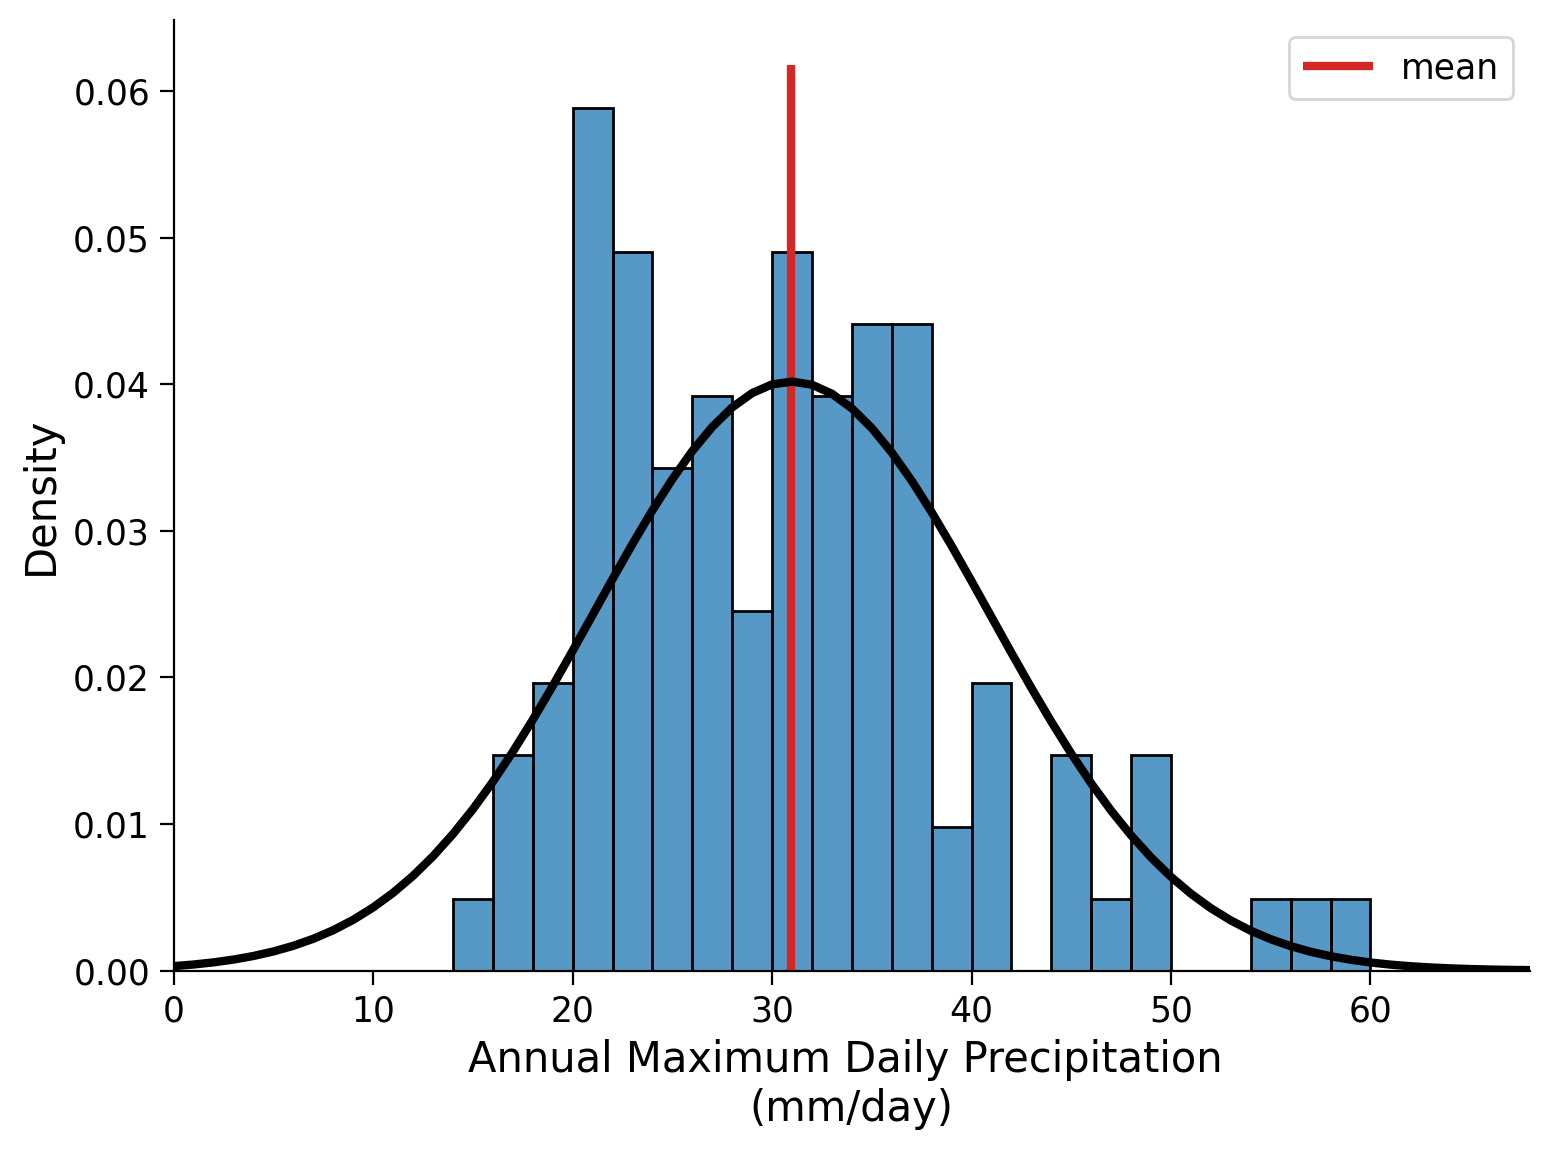

In [19]:
fig, ax = plt.subplots()
bins = np.arange(0, precipitation.max(), 2)
sns.histplot(
    precipitation, bins=bins, ax=ax, stat="density"
)  # notice the different stat being ploted
ax.set_xlim(bins[0], bins[-1])

ylim = ax.get_ylim()

# add in vertical line at mean
ax.vlines(mean_pr, ymin=ylim[0], ymax=ylim[1], color="C3", lw=3, label="mean")

# add PDF
x_r100 = np.arange(0, 100, 1)
ax.plot(x_r100, stats.norm.pdf(x_r100, mean_pr, std_pr), c="k", lw=3)

ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")
ax.legend()

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
Histogram plot of the annual maximum daily precipitation in millimeters per day as above. Here, the computed mean is highlighted as a red vertical line. Furthermore, the computed probability density function is overlaid in black.
</details>

## Coding Exercises 1

Add uncertainty bands to the distribution.

1. Create 1000 records of 100 samples each that are drawn from a normal distribution with the mean and standard deviation of the precipitation record.
2. Compute the 5-th and 95-th percentiles across the 1000-member ensemble and add them to the figure above to get an idea of the uncertainty.

Hint: you can use the function `np.random.normal()` to draw from a normal distribution. Call `np.random.normal()` or `help(np.random.normal)` to understand how to use it. `np.quantile()` is useful for computing quantiles.

In [20]:
# take 1000 records of 100 samples
random_samples = ...

# create placeholder for pdfs
pdfs = np.zeros([x_r100.size, 1000])

# loop through all 1000 records and create a pdf of each sample
for i in range(1000):
    # find pdfs
    pdfi = ...

    # add to array
    ...

In [24]:
# take 1000 records of 100 samples
random_samples = np.random.normal(mean_pr, std_pr, size=[100, 1000])

# create placeholder for pdfs
pdfs = np.zeros([x_r100.size, 1000])

# loop through all 1000 records and create a pdf of each sample
for i in range(1000):
    # find pdfs
    pdfi = stats.norm.pdf(
        x_r100, random_samples[:, i].mean(), random_samples[:, i].std()
    )

    # add to array
    pdfs[:, i] = pdfi

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial1_Solution_a8307b5a.py)



Text(0.5, 0, 'Annual Maximum Daily Precipitation \n(mm/day)')

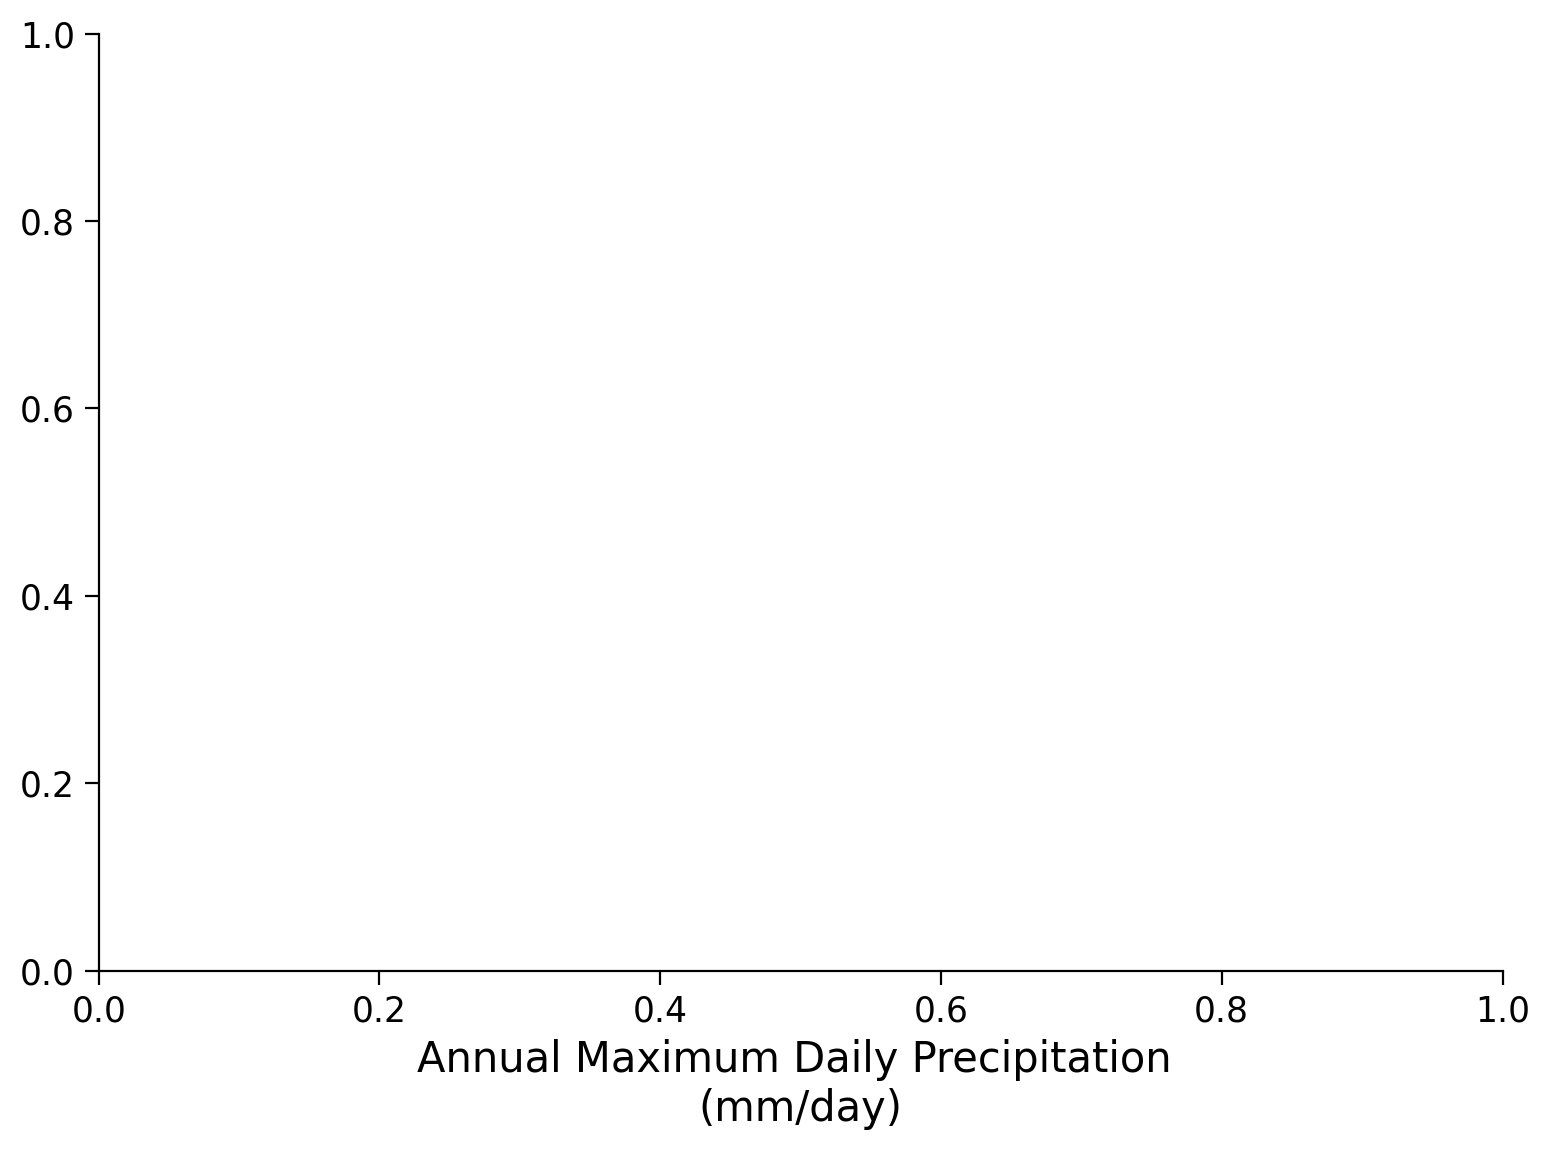

In [21]:
fig, ax = plt.subplots()

# make histogram
_ = ...

# set x limits
_ = ...

# get y lims for plotting mean line
ylim = ...

# add vertical line with mean
_ = ...

# plot pdf
_ = ...

# plot 95th percentile
_ = ...

# plot 5th percentile
_ = ...

# set xlabel
ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")

Text(0.5, 0, 'Annual Maximum Daily Precipitation \n(mm/day)')

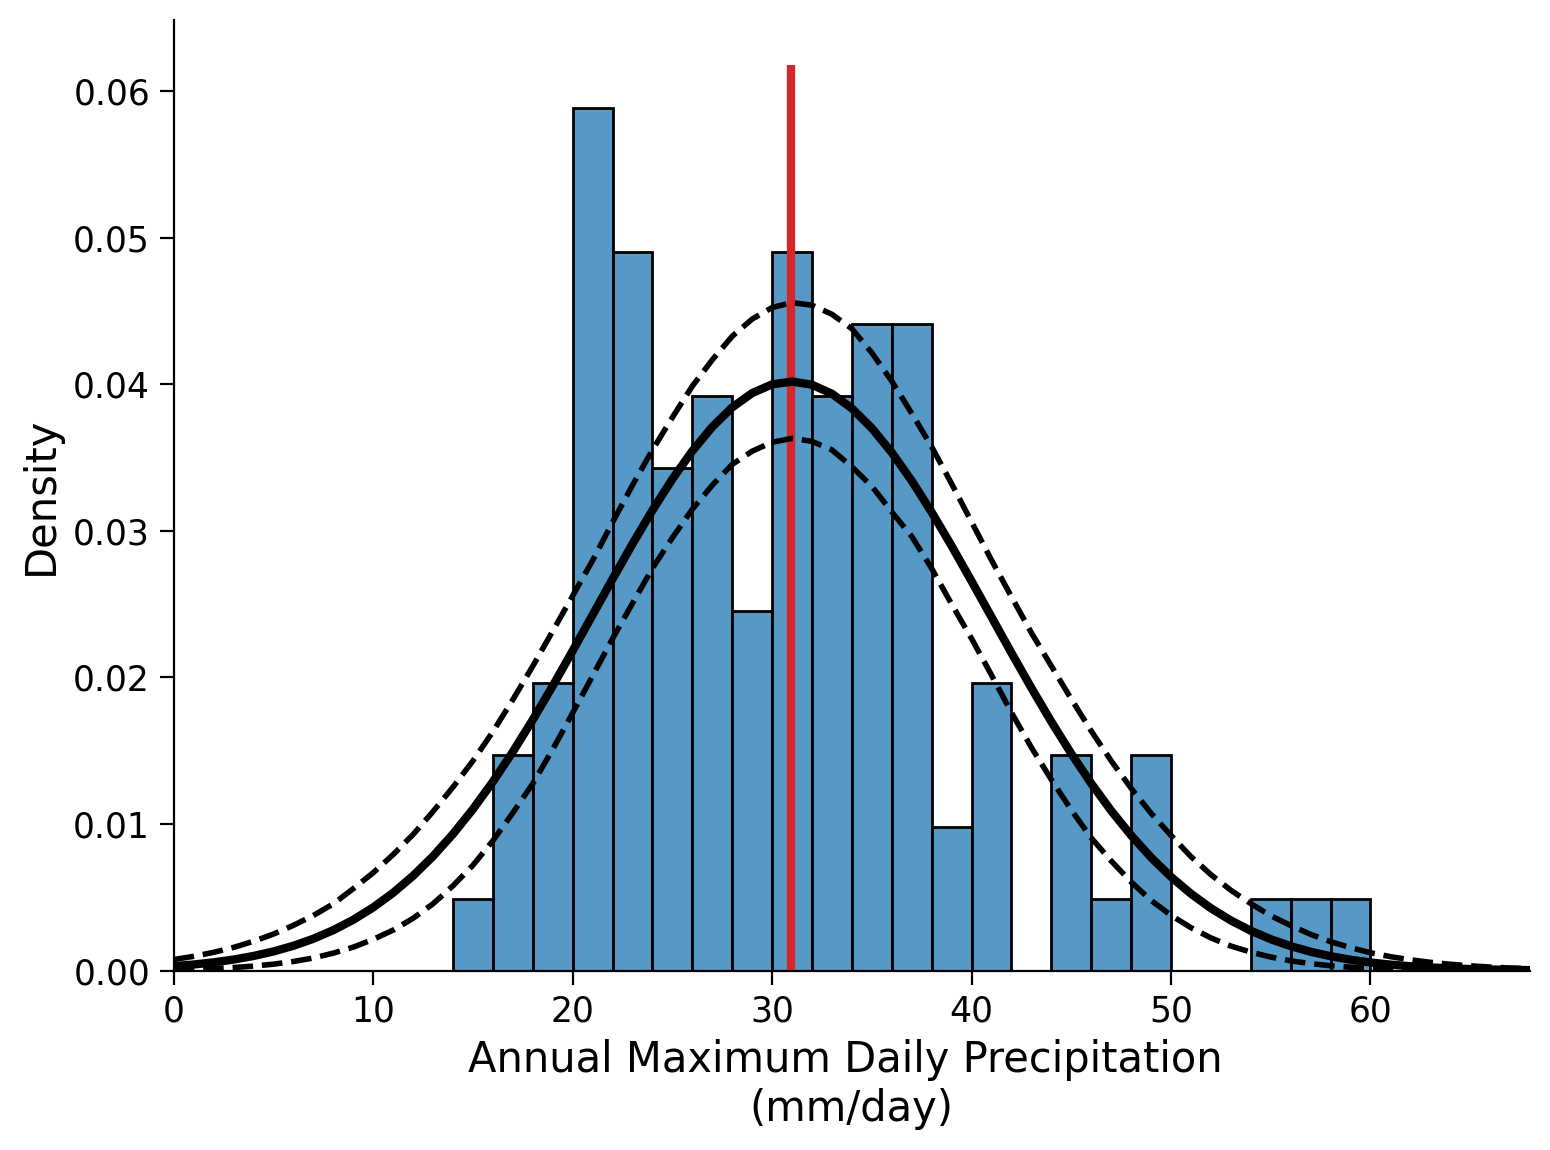

In [25]:
fig, ax = plt.subplots()

# make histogram
_ = sns.histplot(precipitation, bins=bins, stat="density", ax=ax)

# set x limits
_ = ax.set_xlim(bins[0], bins[-1])

# get y lims for plotting mean line
ylim = ax.get_ylim()

# add vertical line with mean
_ = ax.vlines(mean_pr, ymin=ylim[0], ymax=ylim[1], color="C3", lw=3)

# plot pdf
_ = ax.plot(x_r100, stats.norm.pdf(x_r100, mean_pr, std_pr), c="k", lw=3)

# plot 95th percentile
_ = ax.plot(x_r100, np.quantile(pdfs, 0.95, axis=1), "--", lw=2, color="k")

# plot 5th percentile
_ = ax.plot(x_r100, np.quantile(pdfs, 0.05, axis=1), "--", lw=2, color="k")

# set xlabel
ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial1_Solution_e35d1bc8.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/static/W2D3_Tutorial1_Solution_e35d1bc8_2.png>



<details>
<summary> <font color='orangered'>Click to see description of plot  </font></summary>
Histogram plot of the annual maximum daily precipitation in millimeters per day. Here, the computed mean is highlighted as a red vertical line. The computed probability density function is overlaid in black as above. Furthermore, the 5th and 95th percentiles across the 1000-member ensemble are computed and added to the figure as dashed black lines to get an idea of the uncertainty.
</details>

In [22]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_1")

## Questions 1
1. Based on the current plot, does a normal distribution accurately describe your model? Why or why not?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial1_Solution_be51f3cc.py)



In [23]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1")

# Summary
In this tutorial, you focused on the analysis of the annual maximum daily precipitation levels in Germany. You started by visualizing the observational record as both a time series and a distribution. This led you to compute the moments of the record, specifically, the mean, variance, and standard deviation. You then compared the skewness of the precipitation data to a normally distributed set of values. Finally, you assessed the fit of a normal distribution to your dataset.

# Resources

Data from this tutorial uses the 0.25 degree precipitation dataset E-OBS. It combines precipitation observations to generate a gridded (i.e. no "holes") precipitation over Europe. We used the precipitation data from the gridpoint at 51°N, 6°E.

The dataset can be accessed using the KNMI Climate Explorer [here](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=ensembles_025_rr). The Climate Explorer is a great resource to access, manipulate and visualize climate data, including observations and climate model simulations. It is freely accessible - feel free to explore!